Epoch 1/20
20/20 [==============================] - 11s 191ms/step - loss: 0.6933 - accuracy: 0.4968 - val_loss: 0.6933 - val_accuracy: 0.5004
Epoch 2/20
20/20 [==============================] - 2s 117ms/step - loss: 0.6932 - accuracy: 0.5004 - val_loss: 0.6932 - val_accuracy: 0.4996
Epoch 3/20
20/20 [==============================] - 2s 116ms/step - loss: 0.6932 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.4924
Epoch 4/20
20/20 [==============================] - 2s 123ms/step - loss: 0.6932 - accuracy: 0.4987 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 5/20
20/20 [==============================] - 2s 120ms/step - loss: 0.6932 - accuracy: 0.4998 - val_loss: 0.6933 - val_accuracy: 0.5004
Epoch 6/20
20/20 [==============================] - 3s 127ms/step - loss: 0.6932 - accuracy: 0.5015 - val_loss: 0.6932 - val_accuracy: 0.4966
Epoch 7/20
20/20 [==============================] - 2s 119ms/step - loss: 0.6932 - accuracy: 0.5016 - val_loss: 0.6932 - val_accuracy: 0.4945
Epoch

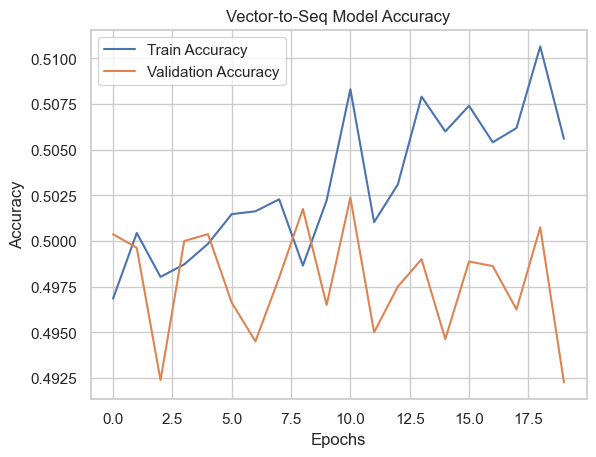

Epoch 1/20
20/20 [==============================] - 5s 97ms/step - loss: 0.6935 - accuracy: 0.0562 - val_loss: 0.6936 - val_accuracy: 0.1813
Epoch 2/20
20/20 [==============================] - 1s 55ms/step - loss: 0.6926 - accuracy: 0.0328 - val_loss: 0.6939 - val_accuracy: 0.0000e+00
Epoch 3/20
20/20 [==============================] - 1s 61ms/step - loss: 0.6923 - accuracy: 0.0000e+00 - val_loss: 0.6941 - val_accuracy: 0.0000e+00
Epoch 4/20
20/20 [==============================] - 2s 77ms/step - loss: 0.6922 - accuracy: 0.0000e+00 - val_loss: 0.6941 - val_accuracy: 0.0000e+00
Epoch 5/20
20/20 [==============================] - 1s 65ms/step - loss: 0.6921 - accuracy: 0.0000e+00 - val_loss: 0.6943 - val_accuracy: 0.0000e+00
Epoch 6/20
20/20 [==============================] - 1s 69ms/step - loss: 0.6920 - accuracy: 0.0000e+00 - val_loss: 0.6944 - val_accuracy: 0.0000e+00
Epoch 7/20
20/20 [==============================] - 2s 77ms/step - loss: 0.6919 - accuracy: 0.0000e+00 - val_loss: 0.6

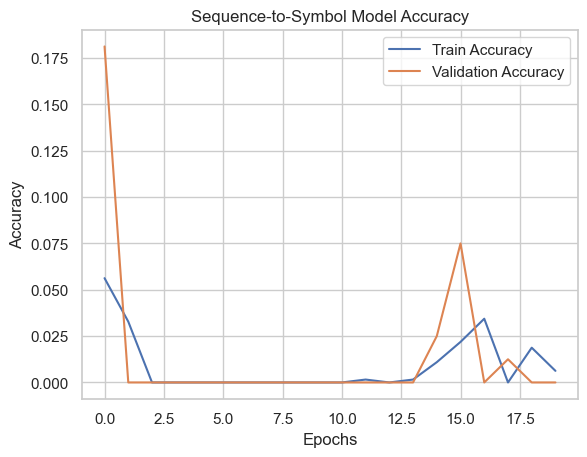

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, RepeatVector

sns.set(style='whitegrid')

# Create Synthetic Temporal Healthcare Data
np.random.seed(42)
time_steps = 50
features = 5
samples = 1000

data = np.random.rand(samples, time_steps, features)
target = np.random.randint(0, 2, (samples, time_steps, 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Normalize Data
scaler = MinMaxScaler()
X_train = X_train.reshape(-1, features)
X_test = X_test.reshape(-1, features)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = X_train.reshape(-1, time_steps, features)
X_test = X_test.reshape(-1, time_steps, features)

# ------------------ Vector-to-Sequence Model ------------------ #
vector_to_seq_model = Sequential([
    LSTM(100, activation='relu', input_shape=(time_steps, features)),
    RepeatVector(time_steps),
    LSTM(100, activation='relu', return_sequences=True),
    TimeDistributed(Dense(1, activation='sigmoid'))
])

vector_to_seq_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_vector_to_seq = vector_to_seq_model.fit(
    X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

loss_v2s, accuracy_v2s = vector_to_seq_model.evaluate(X_test, y_test)
print(f"Vector-to-Seq Model Accuracy: {accuracy_v2s:.4f}")

# Plot Training History - Vector-to-Seq
plt.plot(history_vector_to_seq.history['accuracy'], label='Train Accuracy')
plt.plot(history_vector_to_seq.history['val_accuracy'], label='Validation Accuracy')
plt.title("Vector-to-Seq Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ------------------ Sequence-to-Symbol Model ------------------ #
y_train_flat = y_train.reshape(-1, time_steps)
y_test_flat = y_test.reshape(-1, time_steps)

seq_to_symbol_model = Sequential([
    LSTM(100, activation='relu', input_shape=(time_steps, features)),
    Dense(time_steps, activation='sigmoid')
])

seq_to_symbol_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_seq_to_symbol = seq_to_symbol_model.fit(
    X_train, y_train_flat, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

loss_s2s, accuracy_s2s = seq_to_symbol_model.evaluate(X_test, y_test_flat)
print(f"Sequence-to-Symbol Model Accuracy: {accuracy_s2s:.4f}")

# Plot Training History - Sequence-to-Symbol
plt.plot(history_seq_to_symbol.history['accuracy'], label='Train Accuracy')
plt.plot(history_seq_to_symbol.history['val_accuracy'], label='Validation Accuracy')
plt.title("Sequence-to-Symbol Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/20
8/8 [==============================] - 9s 237ms/step - loss: 0.6886 - accuracy: 0.5359 - val_loss: 0.6766 - val_accuracy: 0.5906
Epoch 2/20
8/8 [==============================] - 0s 28ms/step - loss: 0.6777 - accuracy: 0.5766 - val_loss: 0.6732 - val_accuracy: 0.5906
Epoch 3/20
8/8 [==============================] - 0s 29ms/step - loss: 0.6706 - accuracy: 0.5852 - val_loss: 0.6669 - val_accuracy: 0.5906
Epoch 4/20
8/8 [==============================] - 0s 26ms/step - loss: 0.6611 - accuracy: 0.5984 - val_loss: 0.6619 - val_accuracy: 0.6250
Epoch 5/20
8/8 [==============================] - 0s 26ms/step - loss: 0.6523 - accuracy: 0.6164 - val_loss: 0.6581 - val_accuracy: 0.6219
Epoch 6/20
8/8 [==============================] - 0s 27ms/step - loss: 0.6469 - accuracy: 0.6234 - val_loss: 0.6564 - val_accuracy: 0.6187
Epoch 7/20
8/8 [==============================] - 0s 28ms/step - loss: 0.6457 - accuracy: 0.6313 - val_loss: 0.6562 - val_accuracy: 0.6219
Epoch 8/20
8/8 [==========

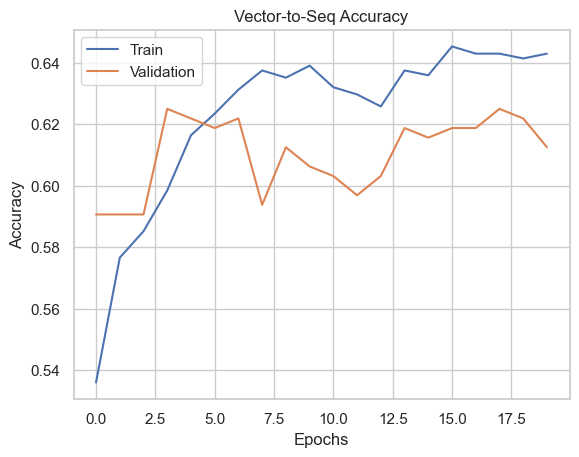

Epoch 1/20
8/8 [==============================] - 7s 131ms/step - loss: 0.6897 - accuracy: 0.1797 - val_loss: 0.6818 - val_accuracy: 0.0625
Epoch 2/20
8/8 [==============================] - 0s 21ms/step - loss: 0.6808 - accuracy: 0.0391 - val_loss: 0.6767 - val_accuracy: 0.0938
Epoch 3/20
8/8 [==============================] - 0s 21ms/step - loss: 0.6754 - accuracy: 0.0156 - val_loss: 0.6723 - val_accuracy: 0.0938
Epoch 4/20
8/8 [==============================] - 0s 21ms/step - loss: 0.6702 - accuracy: 0.0078 - val_loss: 0.6699 - val_accuracy: 0.0625
Epoch 5/20
8/8 [==============================] - 0s 20ms/step - loss: 0.6686 - accuracy: 0.0078 - val_loss: 0.6672 - val_accuracy: 0.0625
Epoch 6/20
8/8 [==============================] - 0s 25ms/step - loss: 0.6630 - accuracy: 0.0078 - val_loss: 0.6645 - val_accuracy: 0.0625
Epoch 7/20
8/8 [==============================] - 0s 23ms/step - loss: 0.6569 - accuracy: 0.0234 - val_loss: 0.6634 - val_accuracy: 0.0625
Epoch 8/20
8/8 [==========

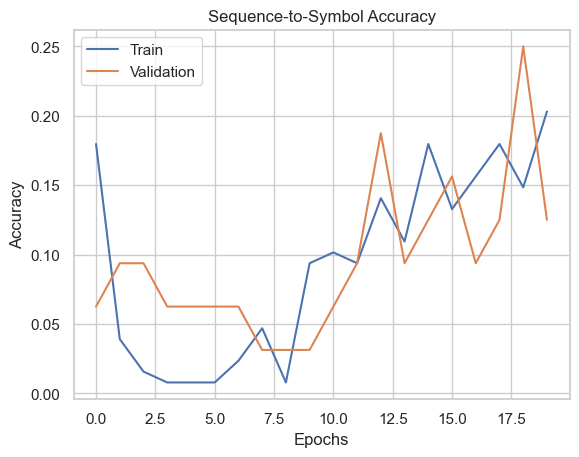

In [2]:
# Install required packages before running
# pip install pandas numpy scikit-learn matplotlib seaborn tensorflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, RepeatVector

# Load data
df = pd.read_csv("disease_diagnosis.csv")

# Drop ID and process target
df = df.drop(columns=['Patient_ID'])
df['Diagnosis'] = df['Diagnosis'].apply(lambda x: 0 if x == 'Healthy' else 1)

# Encode categorical columns
categorical_cols = ['Gender', 'Symptom_1', 'Symptom_2', 'Symptom_3', 
                    'Blood_Pressure_mmHg', 'Severity', 'Treatment_Plan']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Features & target
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

# Normalize
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for time series
time_steps = 10
num_samples = len(X_scaled) // time_steps
X_seq = X_scaled[:num_samples * time_steps].reshape(num_samples, time_steps, -1)
y_seq = y[:num_samples * time_steps].values.reshape(num_samples, time_steps, 1)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Vector-to-Seq model
v2s_model = Sequential([
    LSTM(100, activation='relu', input_shape=(time_steps, X_seq.shape[2])),
    RepeatVector(time_steps),
    LSTM(100, activation='relu', return_sequences=True),
    TimeDistributed(Dense(1, activation='sigmoid'))
])
v2s_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
v2s_hist = v2s_model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2, verbose=1)
loss, acc = v2s_model.evaluate(X_test, y_test)
print(f"Vector-to-Seq Accuracy: {acc:.4f}")

# Plot
plt.plot(v2s_hist.history['accuracy'], label='Train')
plt.plot(v2s_hist.history['val_accuracy'], label='Validation')
plt.title("Vector-to-Seq Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Sequence-to-Symbol model
y_train_flat = y_train.reshape(-1, time_steps)
y_test_flat = y_test.reshape(-1, time_steps)

s2s_model = Sequential([
    LSTM(100, activation='relu', input_shape=(time_steps, X_seq.shape[2])),
    Dense(time_steps, activation='sigmoid')
])
s2s_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
s2s_hist = s2s_model.fit(X_train, y_train_flat, epochs=20, batch_size=16, validation_split=0.2, verbose=1)
loss, acc = s2s_model.evaluate(X_test, y_test_flat)
print(f"Sequence-to-Symbol Accuracy: {acc:.4f}")

# Plot
plt.plot(s2s_hist.history['accuracy'], label='Train')
plt.plot(s2s_hist.history['val_accuracy'], label='Validation')
plt.title("Sequence-to-Symbol Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
